# Pandas DataFrames and Data Visualization

:::{admonition} Learning Objectives
* Be able to aggregate pandas data using [.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
* Be able to find the [.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) or [.count()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) the number of items in aggregated data
* Be able to [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) multiple columns and [.unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) as needed.  
* Be able to represent data in bar and pie charts using either pandas or matplotlib. See [matplotlib's cheatsheets and handouts](https://matplotlib.org/cheatsheets/) as well as [tutorials](https://matplotlib.org/stable/tutorials/index.html)
:::

## pandas.DataFrame.goupby()

### Reading Data

You will need [titanic.csv](https://drive.google.com/uc?id=1ELCvnr0WjQcglNlmxhqzsAOK8DnPaHW_&export=download) data file for this lesson.    


:::{admonition} An aside
Many datasets can be found on line for analysis to practice data science methods.  These can be found from a simple [google search](https://www.google.com/search?q=open+datasets) and include such sites as: [data science dojo](https://code.datasciencedojo.com/datasciencedojo/datasets) or [openml](https://www.openml.org/search?type=data&status=active)
:::

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-colorblind') #high contrast color palette

If you downloaded the titanic.csv file to your computer, you can use the following to read the file. 
```python
import os
path = r'C:\Users\Sean\Downloads\data' #change to your path
filename='titanic.csv'
fullpath=os.path.join(path,filename)
raw=pd.read_csv(fullpath)
```  
Below, we are going to directly read the file from my google drive.  The *1ELCvnr0WjQcglNlmxhqzsAOK8DnPaHW_* is the file id assigned by google for this file. Other formats are listed in the [Appendix: 3114 Data Files](Appendix_3114_Data_Files_direct) 

In [201]:
# This is a direct read of the titanic file from my google drive. 
raw=pd.read_csv('https://drive.google.com/uc?id=1ELCvnr0WjQcglNlmxhqzsAOK8DnPaHW_')
raw.head(3) #looking at only first 3 records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [199]:
from jupyterquiz import display_quiz

# tags:  remove-input
# menu: View/Cell toolbar/tags or in Jupyter lab use gear icon on top right
# this will remove the code below when building Jupyter-book 
# could also use remove-cell but this code has no output

example=[{
        "question": '''For the DataFrame, "raw" above, how would you select the columns: "Name" and "Age" and only the first 10 entries?''',
        "type": "multiple_choice",
        "answers": [
            {
                "code": "raw.loc[0:9,['Name','Age']]",
                "correct": True,
                "feedback": "Correct. "
                    "Here we use .loc[] and not .iloc[] since we are using the column names.  We pass "
                    "the column names as a list, ['Name','Age'], since we are skipping the column 'Sex.' "
                    "If we wanted the columns Name, Sex, and Age, we could just write raw.loc[0:9,'Name':'Age']"
            },
            {
                "code": "raw.iloc[0:9,[3,5]]",
                "correct": True,
                "feedback": "Yes this works but .loc[] is cleaner to read so you don't have to count the column number "
                    " to figure out which column is 3 or 5."
            },
            {
                "code": "raw.iloc[1:10,['Name','Age']]",
                "correct": False,
                "feedback": "Not quite.  Remember the first row is labeled, '0' and "
                    "if we are using column names we need .loc not .iloc"
            }
        ]
    }]

In [200]:
print("Slicing DataFrames using .loc and .iloc")
display_quiz(example);

Slicing DataFrames using .loc and .iloc



(3114:04:stop_and_think_1)=  
Let's take a subset of our data to inlcude the columns: 'Survived', 'Pclass','Sex','Age', and 'Fare'

In [7]:
data=raw.loc[:,['Survived', 'Pclass','Sex','Age','Fare']]
print(f"We have {data.shape[0]} records.  Here are the first 5.")
data.head()

We have 891 records.  Here are the first 5.


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


:::{Note}  
This would be a good place to test the code above as outlined in [Problem 1](3114:04:Exercises:Problem_1).  Notice the use of the f-string and the syntax {data.shape[0]}.  What's happening here? Why are we using curly braces?  What does .shape do? and why did we use .shape[0] and not .shape or .shape[1]?  
:::

(3114:04:groupby-1-column)=
### groupby 1 column

Let's find the average ticket price paid for those that died and those that survived? We can accomplish this by grouping by the column 'Survived.' This will aggregate all the data according to whether the value in this column is a 0 (died) or a 1 (survived).  Then we just tell pandas what to do with this aggregated data.  In our case, we want the mean.  

In [44]:
data.groupby('Survived').mean()

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.626179,22.117887
1,1.950292,28.343690,48.395408


You can see this gives us the mean value of Pclass, Age, and Fare for all those with a 0 (died) or 1 (survived) in the Survived column.  The column values (0 or 1) have now been set as the row index.  

:::{admonition} Something to try  
What do you expect to get if you grouped by 'Pclass' rather than 'Survived' i.e. `data.groupby('Pclass').mean()` ?  Think about it first and then try it and see. The mean values given for 'Survived' is quite interesting.  How would you interpret these results?  
:::

Let's get the mean Fare price for those that died and survived and present those results as a bar plot.  

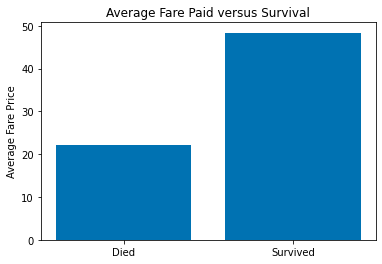

In [11]:
df=data.groupby('Survived').mean()

dataforbar=df.loc[:,'Fare']  #all rows (:), column 'Fare'

labels = ['Died','Survived']

# the following code might be useful for your cheatsheet
fig1, ax1 = plt.subplots()
ax1.bar(x=labels, height=dataforbar) #notice format here for bar plots
ax1.set_ylabel('Average Fare Price')
ax1.set_title('Average Fare Paid versus Survival')

plt.show()

:::{admonition} Something to try  
Group by 'Pclass', `df=data.groupby('Pclass').mean()` and make a barchart for the data in column 'Survived', `dataforbar=df.loc[:,'Survived']`. How would you interpret these results for example, which class had the lowest survival rate?  
:::

### groupby 2 columns

What is the average age of male and female passengers in 1st, 2nd, and 3rd class? To answer this we want to know about a feature "average age" broken out by two other features "Sex" and "Pclass."  For this, we will groupby both Sex and Pclass.  

In [46]:
data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


Wow, we did this all in one step. When you see code with multiple steps in one line like this, you should break it down to better understand what each command is doing. We have already seen the first two `.groupby()` and `.mean()`. So let's start there:

In [13]:
data.groupby(['Sex','Pclass']).mean()

Survived        Age        Fare
Sex    Pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

All the information we need is given in the column "Age."  We could get this by slicing on that column:

In [47]:
data.groupby(['Sex','Pclass']).mean().loc[:,"Age"]

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In this form, we get one column of data with 2 indices for each row. I can see this if I ask for the index of this data:  

In [58]:
data.groupby(['Sex','Pclass']).mean().loc[:,"Age"].index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['Sex', 'Pclass'])

If I wanted the average age of female passengers in 2nd class ('female',2) I would just use .loc again with these two indices including the "( )".  

In [59]:
data.groupby(['Sex','Pclass']).mean().loc[:,"Age"].loc[('female',2)]

28.722972972972972

What is the `.unstack()` for?  This reduces the number of indices by moving the second indice "Pclass" back to the columns. 

In [60]:
data.groupby(['Sex','Pclass']).mean().unstack()

Survived                            Age                        \
Pclass         1         2         3          1          2          3   
Sex                                                                     
female  0.968085  0.921053  0.500000  34.611765  28.722973  21.750000   
male    0.368852  0.157407  0.135447  41.281386  30.740707  26.507589   

              Fare                        
Pclass           1          2          3  
Sex                                       
female  106.125798  21.970121  16.118810  
male     67.226127  19.741782  12.661633

...and now we can grab the "Age" data using `.loc[:,"Age"]`

In [61]:
data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


Compare this to the results we got above **without** the `.unstack()` and printed out again below for your convenience.  

In [62]:
data.groupby(['Sex','Pclass']).mean().loc[:,'Age']

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

You can see this is the same data but the former gives a DataFrame back rather than a Series and it is easier to read and use. Let's make a bar chart of our unstacked result. This data is the average age by 'Sex' and 'Pclass'.  **We will put the Pclass on the x-axis and plot a bar for each Sex (male or female) with a height given by the average Age (y-axis).**  

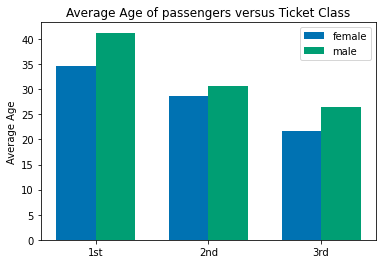

In [203]:
dataforbar=data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

labels = ['1st','2nd','3rd'] #for x-axis
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig1, ax1 = plt.subplots()
ax1.bar(x-width/2, dataforbar.loc['female'], label='female',width=width)
ax1.bar(x+width/2, dataforbar.loc['male'], label='male',width=width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Age')
ax1.set_title('Average Age of passengers versus Ticket Class')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

plt.show()

We did quite a bit of work above with matplotlib (i.e. plt) to get the bar chart to work out.  Since pandas specializes in working with DataFrames, we can use **pandas** to plot rather than matplotlib.  **The code is much easier.** In fact, pandas uses matplotlib to plot but has its own plot functions designed to work with dataframes.  

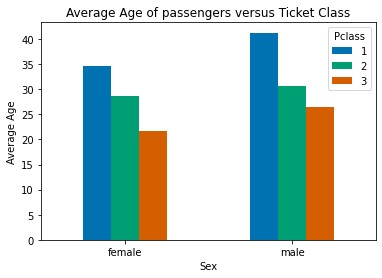

In [202]:
dataforbar=data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

ax=dataforbar.plot.bar(rot=0)
ax.set_ylabel("Average Age")
ax.set_title('Average Age of passengers versus Ticket Class')

plt.show()

**Wow!**  That was much easier but notice that didn't get back exactly the same plot. Notice the x-axis and legend are reversed comparing the two plots.  We can fix this easily by reversing the order of our groupby command from `.groupby(['Sex','Pclass'])` to `.groupby(['Pclass', 'Sex'])`.

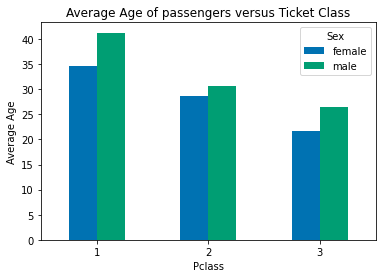

In [75]:
dataforbar=data.groupby(['Pclass','Sex']).mean().unstack().loc[:,'Age']

ax2=dataforbar.plot.bar(rot=0)
ax2.set_ylabel('Average Age')
ax2.set_title('Average Age of passengers versus Ticket Class')

plt.show()

:::{important}  
In general, the number of `unstack()` functions we apply is one less than the number of columns we used in our `groupby()` so if we perform a 3 column groupby we will apply two unstack functions.   
:::

:::{admonition} Basic Forms  
Basic format for finding the average of columns:  
By **one** column:      `data.groupby().mean()`  
By **two** columns:     `data.groupby().mean().unstack()`  
By ***three*** columns: `data.groupby().mean().unstack().unstack()`  
etc...  

Basic format for counting the number of items in columns:  
By **one** column:      `data.groupby().count()`  
By **two** columns:     `data.groupby().count().unstack()`  
By ***three*** columns: `data.groupby().count().unstack().unstack()`  
etc...  
:::

### groupby 3 columns

What is the number of male and female passengers vs ticket class that died vs survived? To answer this question, we want to know about a feature "number of passengers" broken out by three other features "Sex", "Pclass", and "Survived."  For this, we will **groupby all three columns** and **use .count()** rather than .mean() and we will use **.unstack() twice**.  We are also grabbing the count on the "Fare" data since this is complete while some records don't have an age recorded.  

In [204]:
data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,"Fare"]

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

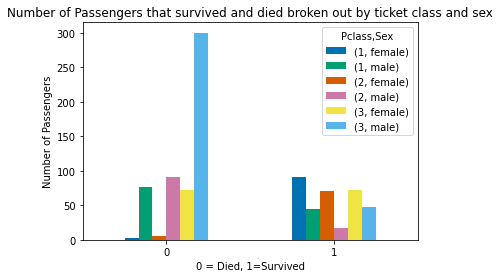

In [206]:
dataforbar=data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,'Fare']

ax=dataforbar.plot.bar(rot=0)
ax.set_ylabel("Number of Passengers")
ax.set_title('Number of Passengers that survived and died broken out by ticket class and sex')
ax.set_xlabel("0 = Died, 1=Survived")
gg=plt.show()

(04:groupby-3-columns:try_1)=  
:::{admonition} Try this...  
Replot the above but only using **one .unstack()** rather than two.  Notice how the labels and plot change relative to the groupby order: 'Survived','Sex','Pclass'.  The last column in this list, 'Pclass' becomes the legend. The x-axis contains combinations of the first two, 'Survived' and 'Sex' with 'Survived' being ordered first so we get (died, female), (died,male), (survived, female), and (survived, male).  
:::

A pie chart might be a good way to represent our data.  See the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html) for more information and examples of the pie chart.   

In [104]:
dataforpie=data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,'Fare']
dataforpie

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

The pie chart uses only 1 column of data but the data we want to plot is represented above in rows so let's exchange the x and y axes i.e., transpose the DataFrame.  

In [115]:
dataforpie.transpose()

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

Now we can make a pie chart on the percentages of various classes of people that died (0) or survived (1).  Let's look at those that survived.  

#### Using pandas plot: 

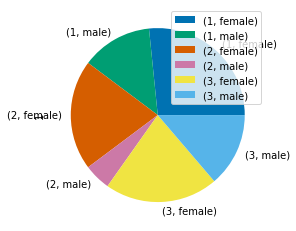

In [207]:
ax=dataforpie.transpose().plot.pie(y=1) # y = column_index
plt.show()

Adding some formatting changes:

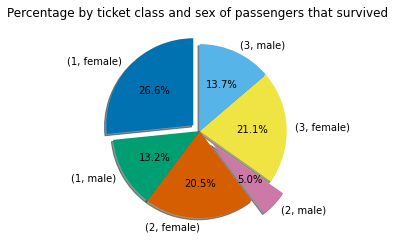

In [181]:
ax=dataforpie.transpose().plot.pie(y=1, autopct='%.1f%%',shadow=True, startangle=90, explode = (0.1, 0, 0, 0.2,0,0), legend=False, ylabel='')
ax.set_title('Percentage by ticket class and sex of passengers that survived ')
plt.show()

#### Using matplotlib:  

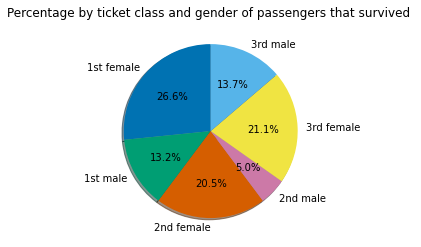

In [178]:
dataforpie=data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,'Fare']

labels = ['1st female','1st male','2nd female','2nd male','3rd female','3rd male']

fig1, ax1 = plt.subplots()
ax1.pie(dataforpie.loc[1], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_title('Percentage by ticket class and gender of passengers that survived ')

plt.show()

## Exercises

(3114:04:Exercises:Problem_1)=
### Problem 1

[Previously](3114:04:stop_and_think_1) in this lesson we had the code: 

```{code}
data=raw.loc[:,['Survived', 'Pclass','Sex','Age','Fare']]
print(f"We have {data.shape[0]} records.  Here are the first 5.")
data.head()
```

Notice the use of the f-string and the syntax {data.shape[0]}.  When you see code that is unfamiliar you should stop and test the coding to see what is going on.  For example here, we might ask: Why are we using curly braces?  What does .shape do? and why did we put [0] after it? 

Answer/Do the following: 
  
a. Remove the "f" in the print command and re-run.  What do you get?  
b. Replace {data.shape[0]} with {data.shape[1]}.  Now fix the word "records" in this statement so that the sentence makes sense.  
c. What does data.shape give you?  
d. Replace data.head() with data.head(2) and data.head(5).  How does this compare to data.head()?  

### Problem 2

Group the titanic data [see section: groupby 1 column](3114:04:groupby-1-column) by 'Pclass', `df=data.groupby('Pclass').mean()` and make a barchart for the data 'Survived', `dataforbar=df.loc[:,'Survived']`. How would you interpret these results for example, which class had the lowest survival rate?  

### Problem 3

*2 column groupby*:  Make a bar chart showing the average ticket price for 1st, second, and third class passengers broken out by sex.  For this problem, put Pclass on the x-axis and plot a bar for each Sex (male or female) with a height equal to the average ticket price (y-axis).  

### Problem 4

a. Re-plot the [example in "groupby 3 columns"](04:groupby-3-columns:try_1) but now only using **one** .unstack() rather than two. Notice how the labels and plot change relative to the groupby order: 'Survived','Sex','Pclass'. The last column in this list, 'Pclass' becomes the legend. The x-axis contains combinations of the first two, 'Survived' and 'Sex' with 'Survived' being ordered first so we get (died, female), (died,male), (survived, female), and (survived, male). Make sure you include an appropriate title and y-label.   

b. Now change the order of the groupby columns to: ['Sex','Pclass','Survived'] and replot again using only one unstack(). Comment on how the order of the groupby corresponds to changes in your x-axis and legend.  


### Problem 5

Using **pandas**, make a pie chart showing the percentage of passengers that <u>died</u> on the titanic broken out by sex and ticket class.  Your pie chart should have 6 pieces: (1st class, female), (1st class, male)... (3rd class, male). Explode only the pie piece for (2nd class,male) by 0.25. Remove both the legend and y-label. Make sure you correct the title.  